# Consignas : 
+ 1 Limpiar la base de duplicados. `OK`
+ 2 Crear una hoja llamada "TABLAS". `OK`
+ 3 Calcular la variación interanual de la producción promedio. `OK`
+ 4 Calcular la variación interanual de la producción promedio por provincia. `OK`
+ 5 Realizar tablas para la pregunta 2, 3, 4, 5 y 6 `OK`
+ 6 Realizar tablas cruzadas por rubro para la pregunta 5 y 6. `OK`
+ 7 Realizar en Word, un breve informe (no más de 2 hojas) para presentar los datos obtenidos. Incluir 2 gráfficos a elección.
+ 8 Armar placas de presentación tipo Dashboard (al menos 2). En Canva o programa similar.

In [40]:
import pandas as pd

In [62]:
# Ingestamos el archivo de excel, que contiene 7 hojas de utilidad
excel = pd.read_excel("Test.XLSX",sheet_name=None)

# Almacenamos las hojas en un diccionario de Pandas
hojas = {}
for nombre_hoja, datos_hoja in excel.items():
    hojas[nombre_hoja] = datos_hoja

# Accedemos cada hoja
base = hojas["Base"]
consignas = hojas["CONSIGNAS"]

# Borramos los duplicados 
base.drop_duplicates(inplace=True)

base["RUBRO"] = base["RUBRO"].str.replace("Electrònico Mecànico e Informàtica","Electrónico mecánico e informática")
base["RUBRO"] = base["RUBRO"].str.replace("Calzado y Marroquinerìa","Calzado y marroquinería")
base["RUBRO"] = base["RUBRO"].str.replace("Material de Transporte","Material de transporte")
# Exportamos a CSV 
base.to_csv("Datasets/base.csv",index=False)


In [42]:
# Observamos las primeras 10 columnas
base.iloc[:,:10].sample(5)

,FECHA,PYME,RUBRO,Principal producto,Provincia,Localidad,CANTIDAD DE EMPLEADOS DE LA EMPRESA,"Su empresa: Produce, Importa, Produce e importa o era productora y migró a importadora",1. Variación de la Producción (diciembre 2018 \nvs. \ndiciembre 2017:),2- La rentabilidad de su industria en diciembre 2018 fue:
19,2019-01-09 00:40:19,HELAFRÍO SRL,Alimentos,Cremas heladas,Tierra del Fuego,"esquiú 58, río grande",11.0,Produce,50.0,Positiva
50,2019-01-10 15:46:04,PASTAS DI PASCUALE,Alimentos,PASTAS FRESCAS ENVASADAS,Cordoba,general manuel savio 5731 - cno. interfábricas,32.0,Produce,-12.0,Nula
2,2019-01-03 19:02:40,CERROS DOMICOS SA,Minerales no metálicos,PIEDRA GRANÍTICA TRITURADA,Buenos Aires,villanueva 1361 1°b,10.0,Produce,30.0,Nula
139,2019-01-16 22:32:52,AA WOLHEIN,Minerales no metálicos,NaN,Buenos Aires,castro barros 56,NaN,Produce,-50.0,Negativa
149,2019-01-17 08:15:31,FIGAN CARNES PORCINAS,Alimentos,Carne porcina envasada al vacío,Santa Fe,"parque industrial ""los polígonos"" santa fe",25.0,Produce,-10.0,Positiva


In [43]:
# Observamos las últimas 10 columnas
base.iloc[:,10:].sample(5)

,3- ¿Cómo evalúa la situación económica actual de su empresa?,"4- En relación a los niveles actuales, ¿cómo cree que evolucionará la producción de su empresa en los próximos meses?",5- Tiene planeado realizar inversiones en 2019?,6- ¿Cómo evalúa el momento actual para invertir en su empresa?,7- ¿Con qué porcentaje de su capacidad instalada está produciendo su empresa en la actualidad?,"8- Comparando los precios actuales de la economía con los que habrá dentro de un año, es decir, en diciembre de 2019, ¿en qué porcentaje espera que los precios suban en los próximos doce meses?",9- ¿Cuanto cree que valdrá el dolar el 31/12/2019?,10- ¿Qué tipo de reformas considera que se deberian implementar para mejorar la situacion de su sector?,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,"11 - ¿Cuál es a su criterio, la medida a tomar que más contribuiría a la reactivación de su sector?",Observaciones
97,Regular,Se mantendrá,No,Malo,40,50.0,45.0,Reforma tributaria,NaN,NaN,NaN,NaN,NaN,Debe activarse el sector de la contruccion por...,NaN
167,Buena,Bajará,Si,Malo,90,35.0,46.0,Reforma tributaria,Reforma laboral,Reforma de acceso al financiamiento,Reforma de barreras tecnológicas,Reformas logísticas,NaN,reforma tributaria ya que algunos costos parec...,NaN
37,Buena,Se mantendrá,No,Malo,30,NaN,NaN,Reforma tributaria,Reforma laboral,Reforma de acceso al financiamiento,NaN,NaN,NaN,baja de tasas de interes y acceso al credito,NaN
12,Buena,Se mantendrá,No,Regular,100,20.0,42.0,Otras,NaN,NaN,NaN,NaN,GUBERNAMENTAL,"Reforma tributaria, reforma laboral, reforma e...",Las tres primeras reformas se deberían impleme...
108,Regular,Aumentará,No,Malo,75,30.0,50.0,Reforma tributaria,NaN,NaN,NaN,NaN,NaN,BAJA DE INTERESES,NaN


---

#### Primeras 3 y 4 consignas

In [44]:
consigna3 = base["1. Variación de la Producción    (diciembre 2018 \nvs. \ndiciembre 2017:)"].mean().round(2)
print(f"La variación interanual de la producción promedio fue de {consigna3}.")
consigna3 = {"La variación interanual de la producción promedio fue de" : consigna3}


La variación interanual de la producción promedio fue de -2.16.


In [45]:
consigna4 = base[["Provincia  ","1. Variación de la Producción    (diciembre 2018 \nvs. \ndiciembre 2017:)"]].groupby("Provincia  ").mean().round(2).reset_index()
consigna4["1. Variación de la Producción    (diciembre 2018 \nvs. \ndiciembre 2017:)"] =consigna4["1. Variación de la Producción    (diciembre 2018 \nvs. \ndiciembre 2017:)"] / 100
consigna4

,Provincia,1. Variación de la Producción (diciembre 2018 \nvs. \ndiciembre 2017:)
0,Buenos Aires,0.0024
1,CABA,-0.1500
2,Chaco,0.0911
3,Chubut,0.3143
4,Cordoba,-0.0712
5,Entre Rios,-0.0833
6,Jujuy,-0.0409
7,La Rioja,-0.1570
8,Mendoza,0.1150
9,Misiones,-0.0032


In [46]:
base["RUBRO"] = base["RUBRO"].str.replace("Electrònico Mecànico e Informàtica","Electrónico mecánico e informática")
base["RUBRO"] = base["RUBRO"].str.replace("Calzado y Marroquinerìa","Calzado y marroquinería")
base["RUBRO"] = base["RUBRO"].str.replace("Material de Transporte","Material de transporte")
delta_por_rubro = base[["RUBRO","1. Variación de la Producción    (diciembre 2018 \nvs. \ndiciembre 2017:)"]].groupby("RUBRO").mean().round(2).reset_index()
delta_por_rubro["1. Variación de la Producción    (diciembre 2018 \nvs. \ndiciembre 2017:)"] = delta_por_rubro["1. Variación de la Producción    (diciembre 2018 \nvs. \ndiciembre 2017:)"] / 100
delta_por_rubro

,RUBRO,1. Variación de la Producción (diciembre 2018 \nvs. \ndiciembre 2017:)
0,Alimentos,-0.0193
1,Calzado y marroquinería,-0.2008
2,Electrónico mecánico e informática,-0.1614
3,Madera y muebles,-0.0167
4,Material de transporte,-0.1833
5,Minerales no metálicos,-0.1008
6,Otro,0.0467
7,"Papel, carton, edición e impresión",-0.0356
8,Productos de caucho y plásticos,0.0407
9,"Productos de metal, maquinaria y equipo",0.0683


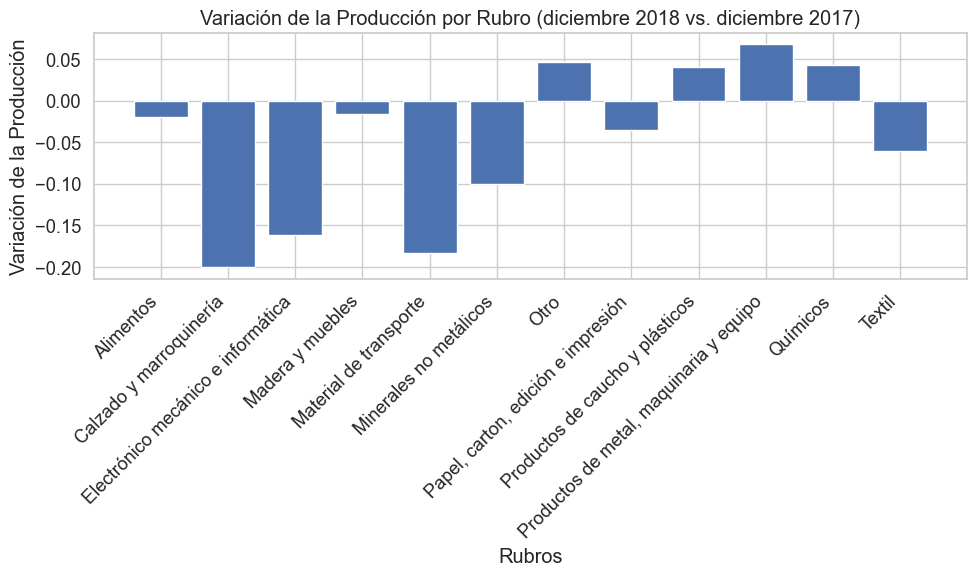

In [47]:
import matplotlib.pyplot as plt
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(delta_por_rubro['RUBRO'], delta_por_rubro["1. Variación de la Producción    (diciembre 2018 \nvs. \ndiciembre 2017:)"])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Rubros')
plt.ylabel('Variación de la Producción')
plt.title('Variación de la Producción por Rubro (diciembre 2018 vs. diciembre 2017)')
plt.tight_layout()
plt.show()

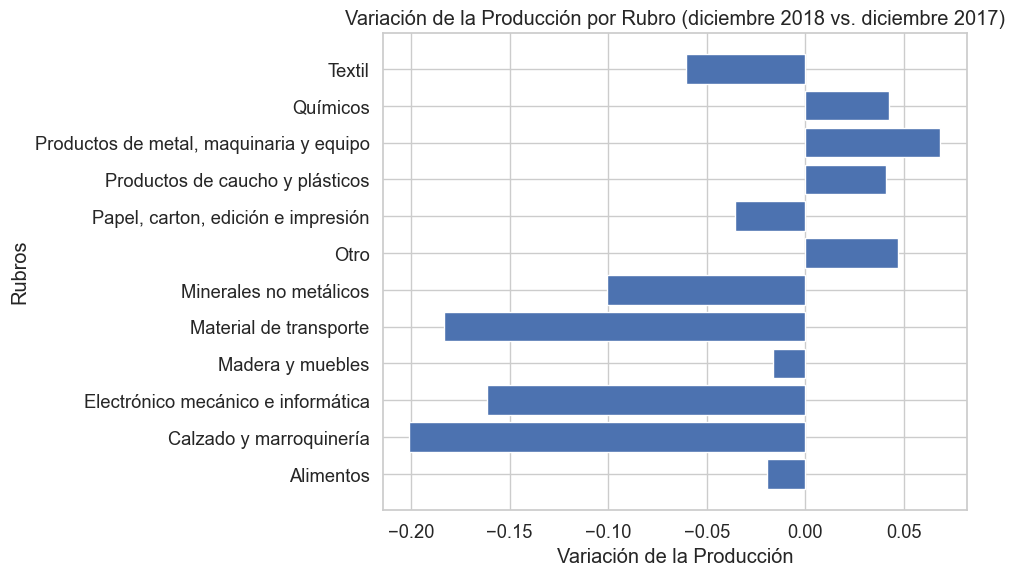

In [48]:
# Crear el gráfico de barras horizontales
plt.figure(figsize=(10, 6))
plt.barh(delta_por_rubro['RUBRO'], delta_por_rubro["1. Variación de la Producción    (diciembre 2018 \nvs. \ndiciembre 2017:)"])
plt.xlabel('Variación de la Producción')
plt.ylabel('Rubros')
plt.title('Variación de la Producción por Rubro (diciembre 2018 vs. diciembre 2017)')
plt.tight_layout()
plt.show()

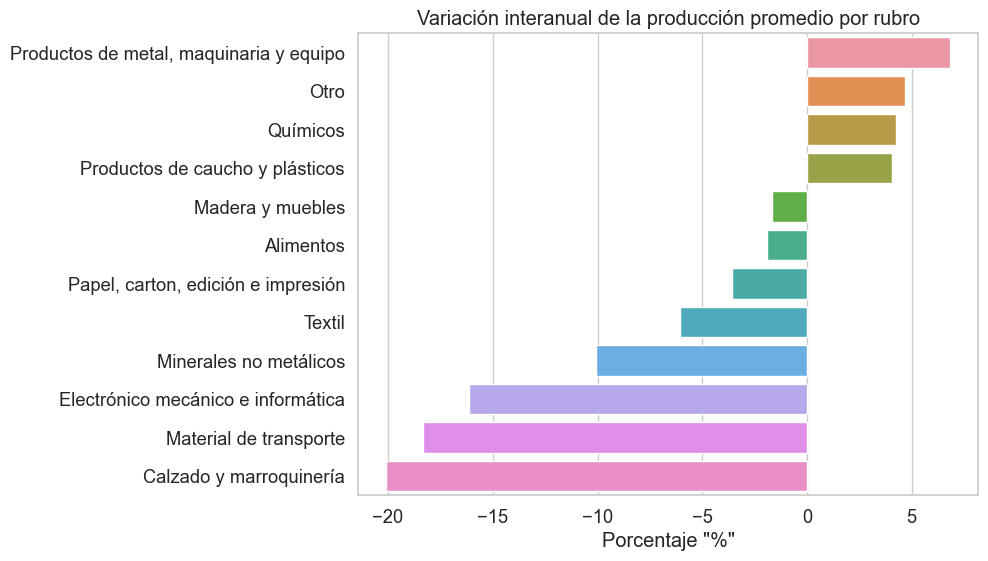

In [49]:
import seaborn as sns
# Configurar el estilo de la gráfica
sns.set(style='whitegrid', font_scale=1.2, rc={"figure.figsize":(8,6)})
delta_por_rubro["1. Variación de la Producción    (diciembre 2018 \nvs. \ndiciembre 2017:)"] = delta_por_rubro["1. Variación de la Producción    (diciembre 2018 \nvs. \ndiciembre 2017:)"] * 100
f_sorted = delta_por_rubro.sort_values(by="1. Variación de la Producción    (diciembre 2018 \nvs. \ndiciembre 2017:)", ascending=False)
# Creamos un grafico de barras horizontal
ax = sns.barplot(x="1. Variación de la Producción    (diciembre 2018 \nvs. \ndiciembre 2017:)", y='RUBRO', data=f_sorted)

# Añadimos las etiquetas y el título
ax.set_xlabel('Porcentaje "%"')
ax.set_ylabel('')
ax.set_title('Variación interanual de la producción promedio por rubro')
# Exportar el gráfico como imagen en formato PNG
plt.savefig('grafico_barras.png', bbox_inches='tight')
# Mostrar el gráfico
plt.show()

---

#### Consigna 5

In [50]:
# Para la consigna 5 consigop los nombres de las tablas
columnas = base.columns[9:14].tolist()
columnas

['2- La rentabilidad de su industria en diciembre 2018 fue:',
 '3- ¿Cómo evalúa la situación económica actual de su empresa? ',
 '4- En relación a los niveles actuales, ¿cómo cree que evolucionará la producción de su empresa en los próximos meses?',
 '5- Tiene planeado realizar inversiones en 2019?',
 '6- ¿Cómo evalúa el momento actual para invertir en su empresa?']

In [51]:
# Para realizar la consigna 5 podemos iterar ya que es realizar los mimsmos calculos :)
lista_tablas = []
for elemento in columnas :     
    tabla = base[elemento].value_counts().reset_index()
    tabla["%"] = (tabla["count"] / tabla["count"].sum())
    tabla.loc[len(tabla)] = ["Total",tabla["count"].sum(),tabla["%"].sum()]
    lista_tablas.append(tabla)

In [52]:
lista_tablas[0]

,2- La rentabilidad de su industria en diciembre 2018 fue:,count,%
0,Nula,74,0.413408
1,Positiva,60,0.335196
2,Negativa,43,0.240223
3,NS/NC,2,0.011173
4,Total,179,1.000000


In [53]:
lista_tablas[1]

,3- ¿Cómo evalúa la situación económica actual de su empresa?,count,%
0,Regular,88,0.491620
1,Buena,45,0.251397
2,Mala,31,0.173184
3,Crítica,11,0.061453
4,Muy Buena,4,0.022346
5,Total,179,1.000000


In [54]:
lista_tablas[2]

,"4- En relación a los niveles actuales, ¿cómo cree que evolucionará la producción de su empresa en los próximos meses?",count,%
0,Se mantendrá,95,0.530726
1,Aumentará,41,0.229050
2,Bajará,35,0.195531
3,NS/NC,8,0.044693
4,Total,179,1.000000


In [55]:
lista_tablas[3]

,5- Tiene planeado realizar inversiones en 2019?,count,%
0,No,104,0.581006
1,Lo estoy evaluando,37,0.206704
2,Si,35,0.195531
3,NS/NC,3,0.016760
4,Total,179,1.000000


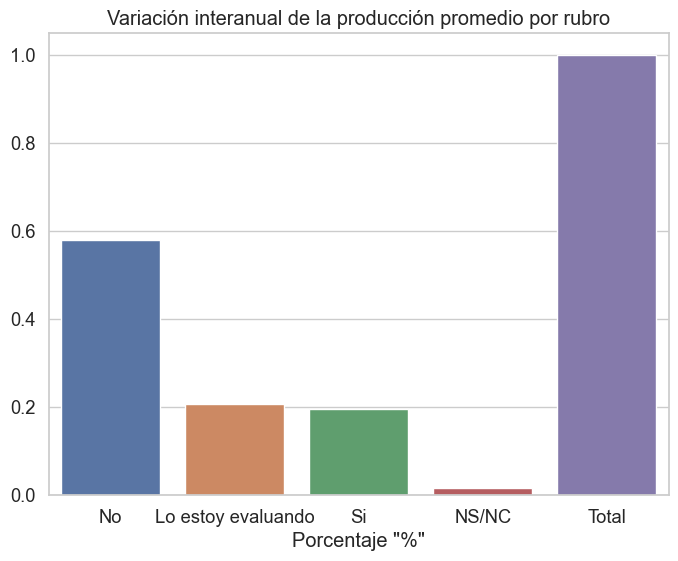

In [56]:
import seaborn as sns
# Configurar el estilo de la gráfica
sns.set(style='whitegrid', font_scale=1.2, rc={"figure.figsize":(8,6)})
# Creamos un grafico de barras horizontal
ax = sns.barplot(x="5- Tiene planeado realizar inversiones en 2019?", y='%', data=lista_tablas[3])

# Añadimos las etiquetas y el título
ax.set_xlabel('Porcentaje "%"')
ax.set_ylabel('')
ax.set_title('Variación interanual de la producción promedio por rubro')
# Mostrar el gráfico
plt.show()

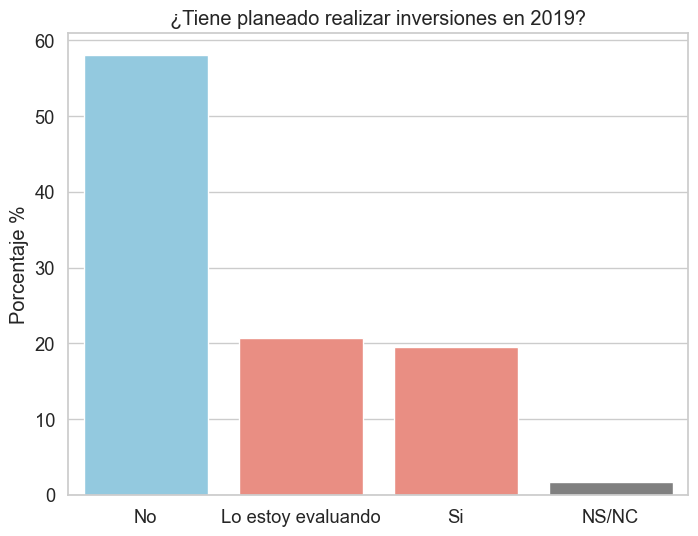

In [57]:
# gráfico

sns.set(style='whitegrid', font_scale=1.2, rc={"figure.figsize":(8,6)})
# eliminamos el total
df2 = lista_tablas[3].drop(index=lista_tablas[3].index[-1])
df2["%"] = df2["%"] * 100
# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=df2["5- Tiene planeado realizar inversiones en 2019?"], y=df2["%"], palette=["skyblue", "salmon", "salmon", "gray"])

# Título y etiquetas
plt.title('¿Tiene planeado realizar inversiones en 2019?')
plt.xlabel('')
plt.ylabel('Porcentaje %')
plt.savefig('grafico_barras2.png', bbox_inches='tight')
# Mostrar el gráfico
plt.show()

In [58]:
lista_tablas[4]

,6- ¿Cómo evalúa el momento actual para invertir en su empresa?,count,%
0,Malo,68,0.379888
1,Regular,67,0.374302
2,Muy Malo,27,0.150838
3,Bueno,11,0.061453
4,NS/NC,4,0.022346
5,Muy Bueno,2,0.011173
6,Total,179,1.000000


---

#### Consigna 6

In [66]:
aux = ["5- Tiene planeado realizar inversiones en 2019?","6- ¿Cómo evalúa el momento actual para invertir en su empresa?"]
tablas_5_6_rubro = []
for i in aux : 
    x = base[["RUBRO",i]].value_counts().reset_index()
    df_pivot = x.pivot_table(index="RUBRO", columns=[i], values='count', fill_value=0)
    df_pivot["Total"] = df_pivot.sum(axis=1)
    columns = df_pivot.columns[0:]
    for n in columns :
        df_pivot[n] = ((df_pivot[n] / df_pivot["Total"] ) ).round(2)
    tablas_5_6_rubro.append(df_pivot)    

In [77]:
tablas_5_6_rubro[0] = tablas_5_6_rubro[0].reset_index()

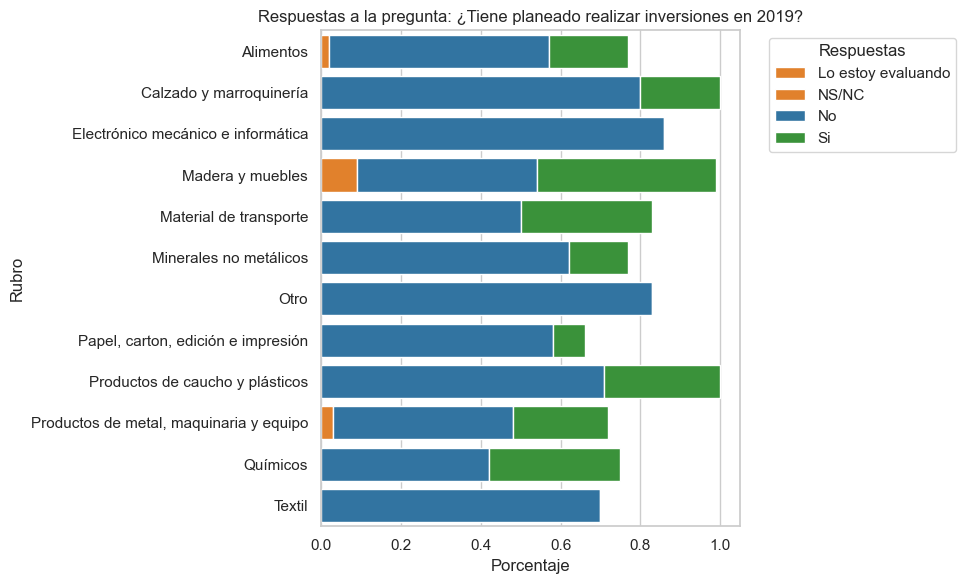

In [84]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Definir el estilo de Seaborn
sns.set(style="whitegrid")

# Crear el gráfico de barras apiladas horizontales
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="Lo estoy evaluando", y="RUBRO", data=tablas_5_6_rubro[0], color="tab:orange", label="Lo estoy evaluando")
ax = sns.barplot(x="NS/NC", y="RUBRO", data=tablas_5_6_rubro[0], color="tab:orange", label="NS/NC")
ax = sns.barplot(x="No", y="RUBRO", data=tablas_5_6_rubro[0], color="tab:blue", label="No", left=tablas_5_6_rubro[0]["NS/NC"])
ax = sns.barplot(x="Si", y="RUBRO", data=tablas_5_6_rubro[0], color="tab:green", label="Si", left=tablas_5_6_rubro[0]["NS/NC"] + tablas_5_6_rubro[0]["No"])

# Configurar etiquetas y leyenda
plt.legend(title="Respuestas", bbox_to_anchor=(1.05, 1), loc='upper left')

# Etiquetas de los ejes y título
plt.xlabel("Porcentaje")
plt.ylabel("Rubro")
plt.title("Respuestas a la pregunta: ¿Tiene planeado realizar inversiones en 2019?")

# Mostrar el gráfico
plt.tight_layout()
plt.show()



In [61]:
tablas_5_6_rubro[1]

6- ¿Cómo evalúa el momento actual para invertir en su empresa?,Bueno,Malo,Muy Bueno,Muy Malo,NS/NC,Regular,Total
RUBRO,,,,,,,
Alimentos,0.09,0.30,0.00,0.11,0.00,0.50,1.0
Calzado y marroquinería,0.00,0.60,0.00,0.20,0.00,0.20,1.0
Electrónico mecánico e informática,0.00,0.57,0.00,0.14,0.00,0.29,1.0
Madera y muebles,0.00,0.45,0.00,0.27,0.09,0.18,1.0
Material de transporte,0.00,0.50,0.00,0.17,0.17,0.17,1.0
Minerales no metálicos,0.08,0.15,0.08,0.15,0.00,0.54,1.0
Otro,0.00,0.17,0.00,0.33,0.00,0.50,1.0
"Papel, carton, edición e impresión",0.00,0.50,0.00,0.25,0.00,0.25,1.0
Productos de caucho y plásticos,0.07,0.50,0.00,0.14,0.00,0.29,1.0


---

In [204]:
pregunta7 = base[["RUBRO","7- ¿Con qué porcentaje de su capacidad instalada está produciendo su empresa en la actualidad? "]].groupby("RUBRO").mean().reset_index()
pregunta7["7- ¿Con qué porcentaje de su capacidad instalada está produciendo su empresa en la actualidad? "] = pregunta7["7- ¿Con qué porcentaje de su capacidad instalada está produciendo su empresa en la actualidad? "]/100
pregunta7

,RUBRO,7- ¿Con qué porcentaje de su capacidad instalada está produciendo su empresa en la actualidad?
0,Alimentos,0.598864
1,Calzado y Marroquinerìa,0.600000
2,Calzado y marroquinería,0.825000
3,Electrònico Mecànico e Informàtica,0.200000
4,Electrónico mecánico e informática,0.550000
5,Madera y muebles,0.618182
6,Material de Transporte,0.450000
7,Material de transporte,0.450000
8,Minerales no metálicos,0.676923
9,Otro,0.416667


In [205]:
pregunta8 = base[["RUBRO","8- Comparando los precios actuales de la economía con los que habrá dentro de un año, es decir, en diciembre de 2019, ¿en qué porcentaje espera que los precios suban en los próximos doce meses?"]].groupby("RUBRO").mean().reset_index()
pregunta8["8- Comparando los precios actuales de la economía con los que habrá dentro de un año, es decir, en diciembre de 2019, ¿en qué porcentaje espera que los precios suban en los próximos doce meses?"] = pregunta8["8- Comparando los precios actuales de la economía con los que habrá dentro de un año, es decir, en diciembre de 2019, ¿en qué porcentaje espera que los precios suban en los próximos doce meses?"] /100
pregunta8

,RUBRO,"8- Comparando los precios actuales de la economía con los que habrá dentro de un año, es decir, en diciembre de 2019, ¿en qué porcentaje espera que los precios suban en los próximos doce meses?"
0,Alimentos,0.336905
1,Calzado y Marroquinerìa,0.250000
2,Calzado y marroquinería,0.375000
3,Electrònico Mecànico e Informàtica,NaN
4,Electrónico mecánico e informática,0.290000
5,Madera y muebles,0.323636
6,Material de Transporte,0.275000
7,Material de transporte,0.375000
8,Minerales no metálicos,0.370833
9,Otro,0.375000


In [206]:
base["9- ¿Cuanto cree que valdrá el dolar el 31/12/2019?"].mean() # Blue a $70 y oficial 60

49.1859756097561

In [207]:
base[["RUBRO","Provincia  ","CANTIDAD DE EMPLEADOS DE LA EMPRESA"]].groupby(["RUBRO","Provincia  "]).mean().reset_index()

,RUBRO,Provincia,CANTIDAD DE EMPLEADOS DE LA EMPRESA
0,Alimentos,Buenos Aires,78.000000
1,Alimentos,Chaco,35.333333
2,Alimentos,Chubut,40.500000
3,Alimentos,Cordoba,15.666667
4,Alimentos,Jujuy,8.500000
...,...,...,...
87,Textil,Mendoza,7.000000
88,Textil,Misiones,14.000000
89,Textil,Salta,10.000000
90,Textil,Santa Fe,5.000000


In [208]:
empleados_por_rubro = base[["RUBRO","CANTIDAD DE EMPLEADOS DE LA EMPRESA"]].groupby(["RUBRO"]).mean().round(2).reset_index()
empleados_por_rubro

,RUBRO,CANTIDAD DE EMPLEADOS DE LA EMPRESA
0,Alimentos,41.39
1,Calzado y Marroquinerìa,15.00
2,Calzado y marroquinería,16.67
3,Electrònico Mecànico e Informàtica,10.00
4,Electrónico mecánico e informática,13.00
5,Madera y muebles,21.45
6,Material de Transporte,24.00
7,Material de transporte,16.75
8,Minerales no metálicos,48.83
9,Otro,27.50


---

In [209]:
rubros = base["RUBRO"].value_counts().reset_index()

---

#### Análisis de las reformas

In [210]:
columnas = base.columns[17:22]
listaff = []
for elemento in columnas : 
    df = base[elemento].value_counts().reset_index()
    listaff.append(df)
for elemento in listaff :
    elemento.columns = listaff[0].columns    
df_concat = pd.concat(listaff, ignore_index=True)    
pregunta10 = df_concat.groupby('10- ¿Qué tipo de reformas considera que se deberian implementar para mejorar la situacion de su sector?').sum().sort_values(by="count",ascending=False).reset_index()
pregunta10

,10- ¿Qué tipo de reformas considera que se deberian implementar para mejorar la situacion de su sector?,count
0,Reforma tributaria,132
1,Reforma laboral,98
2,Reforma de acceso al financiamiento,84
3,Reforma de barreras tecnológicas,33
4,Reformas logísticas,32
5,Otras,8
6,,1


---

### Gráficos de tablas 2 a 6

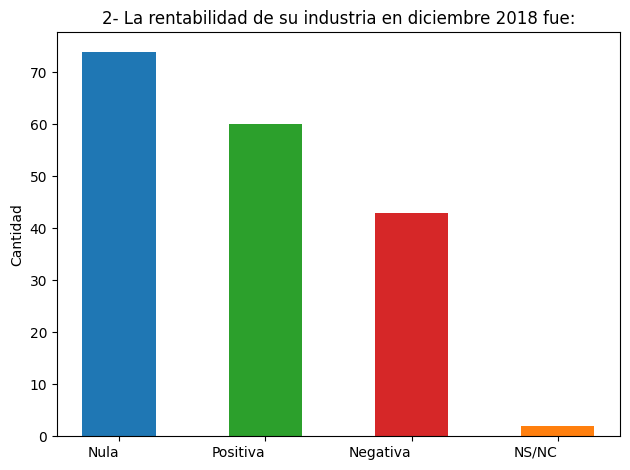

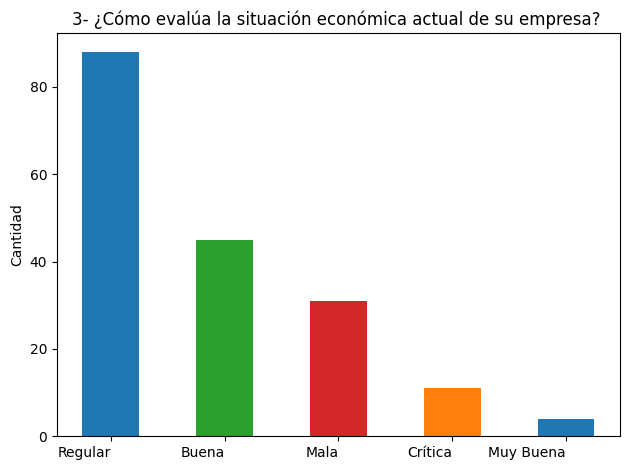

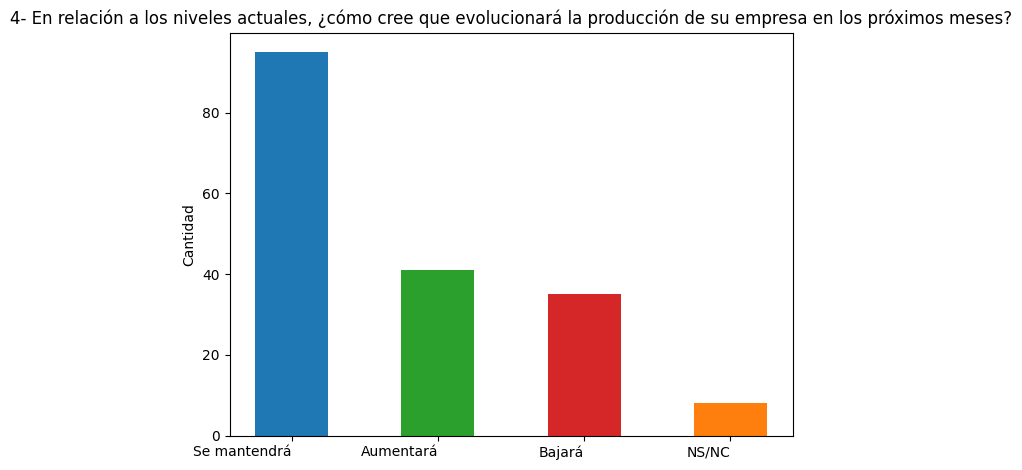

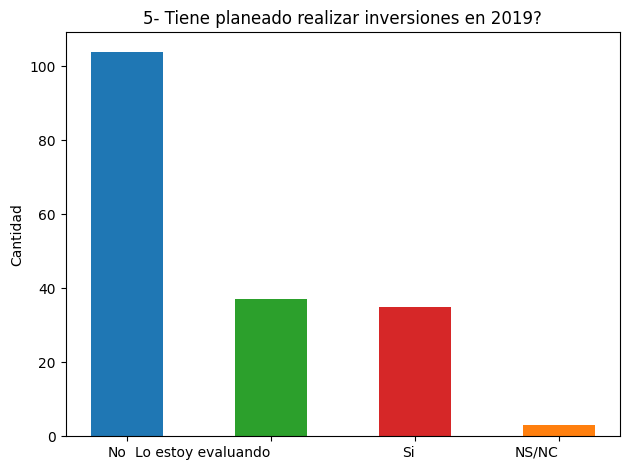

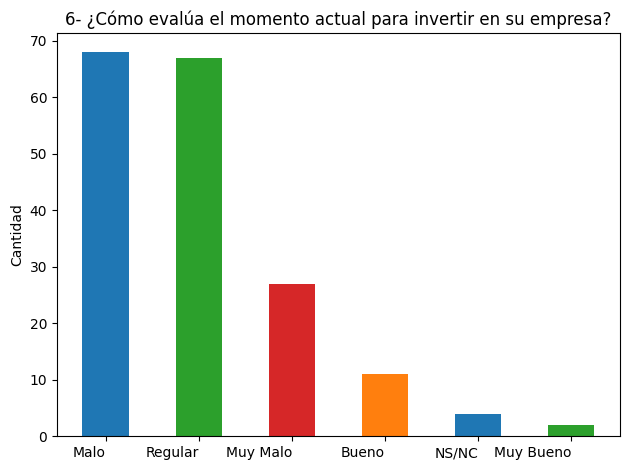

In [211]:
import pandas as pd
import matplotlib.pyplot as plt
for elemento in lista_tablas :
    columna = elemento.columns[0]
    # Eliminamos la fila "Total", ya que no contiene información relevante para el gráfico de barras
    df = elemento[elemento[columna] != 'Total']

    # Configuración de colores para las barras
    colores = ['#1f77b4', '#2ca02c', '#d62728', '#ff7f0e']

    # Crear la figura y los ejes
    fig, ax = plt.subplots()

    # Ancho de las barras
    ancho_barras = 0.5

    # Posición de las barras en el eje x
    posiciones = range(len(df))

    # Graficar las barras
    ax.bar(posiciones, df['count'], ancho_barras, color=colores)

    # Configuración de los ejes y la leyenda
    ax.set_xticks(posiciones)
    ax.set_xticklabels(df[columna], rotation=0, ha='right')
    ax.set_ylabel('Cantidad')
    ax.set_title(columna)
    #ax.legend(['Count'])

    # Mostrar el gráfico
    plt.tight_layout()
    plt.show()

# Para exportar a EXCEL

In [212]:
import pandas as pd

# 
# Creamos un objeto ExcelWriter para escribir en el archivo
with pd.ExcelWriter('RESOLUCIÓN PRUEBA TÉCNICA - ESTADISTICAS E INFORMES.xlsx', engine='openpyxl') as writer:
    # Escribimos el DataFrame df1 en la hoja 'Tabla_Completa'
    base.to_excel(writer, sheet_name='Base', index=False)

    # Consigna 3 hardcodear

    # Consigna 4
    consigna4.to_excel(writer, sheet_name='Tablas',startrow= 2, index=False)
    delta_por_rubro.to_excel(writer, sheet_name='Tablas', startrow=len(consigna4) + 4, index=False)

    # Consigna 5
    lista_tablas[0].to_excel(writer, sheet_name='Tablas', startrow=len(consigna4) + 6 + len(delta_por_rubro), index=False)
    lista_tablas[1].to_excel(writer, sheet_name='Tablas', startrow=len(consigna4) + 8 + len(lista_tablas[0]) + len(delta_por_rubro), index=False)
    lista_tablas[2].to_excel(writer, sheet_name='Tablas', startrow=len(consigna4) + 10 + len(lista_tablas[0])+ len(lista_tablas[1])+ len(delta_por_rubro), index=False)
    lista_tablas[3].to_excel(writer, sheet_name='Tablas', startrow=len(consigna4) + 12 + len(lista_tablas[0])+ len(lista_tablas[1])+ len(lista_tablas[2])+ len(delta_por_rubro), index=False)
    lista_tablas[4].to_excel(writer, sheet_name='Tablas', startrow=len(consigna4) + 14 + len(lista_tablas[0])+ len(lista_tablas[1])+ len(lista_tablas[2])+ len(lista_tablas[3])+ len(delta_por_rubro), index=False)

    # Consigna 6
    rubros.to_excel(writer, sheet_name='Tablas',startcol=len(lista_tablas[0].columns) + 2,index=False)
    empleados_por_rubro.to_excel(writer, sheet_name='Tablas',startcol=len(lista_tablas[0].columns) + 4 + len(rubros.columns) ,index=False)
    tablas_5_6_rubro[0].to_excel(writer, sheet_name='Tablas',startcol=len(lista_tablas[0].columns) + 2,startrow=len(rubros) + 3)
    tablas_5_6_rubro[1].to_excel(writer, sheet_name='Tablas',startcol=len(lista_tablas[0].columns) + 2,startrow=len(tablas_5_6_rubro[0]) + 5 + len(rubros))
    pregunta7.to_excel(writer, sheet_name='Tablas',startcol=len(lista_tablas[0].columns) + 2,startrow=len(tablas_5_6_rubro[0]) + 7 + len(rubros) + len(tablas_5_6_rubro[1]),index=False)
    pregunta8.to_excel(writer, sheet_name='Tablas',startcol=len(lista_tablas[0].columns) + 2,startrow=len(tablas_5_6_rubro[0]) + 9 + len(rubros)+ len(tablas_5_6_rubro[1]) + + len(tablas_5_6_rubro[1]),index=False)
    
    pregunta10.to_excel(writer, sheet_name='Tablas',startcol=len(lista_tablas[0].columns) + 2 + len(tablas_5_6_rubro[1].columns) ,index=False)
# El objeto ExcelWriter se cierra automáticamente al salir del bloque with
# Para ir agregando voy sumando a las filas y lo mismo a las columnas
